In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_excel('http://taanila.fi/Concrete_Data.xlsx')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [6]:
#Onko puuttuvia tietoja:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


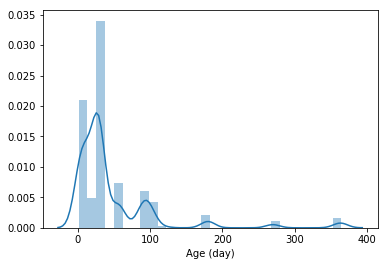

In [7]:
#Target-muuttujan (selitettävän muuttujan) jakauma:
sns.distplot(df['Age (day)'], bins=30)

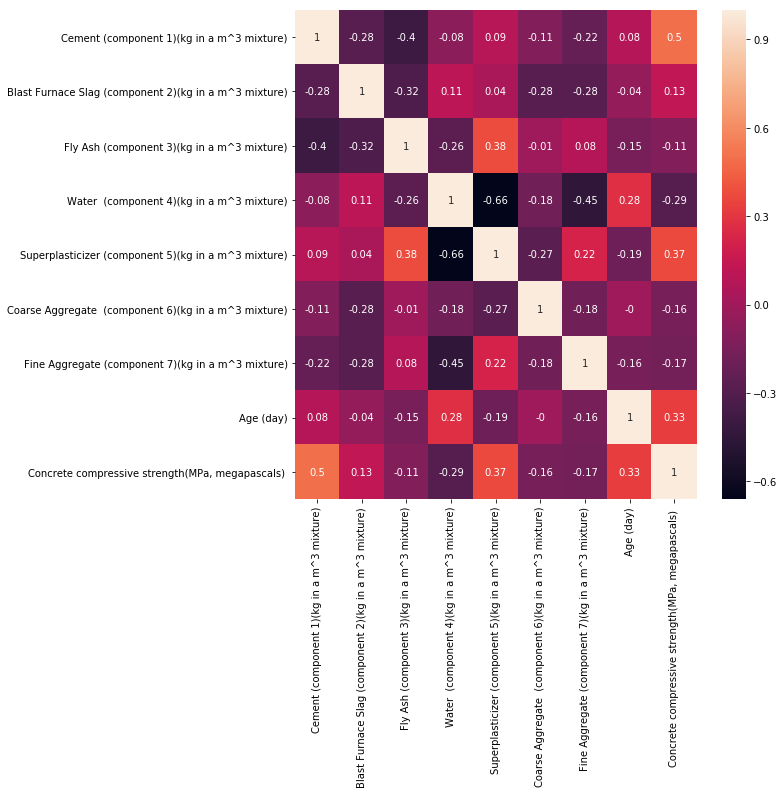

In [9]:
#Korrelaatiokertoimet kahden desimaalin tarkkuudella.
korrelaatiot = df.corr().round(2)

#Luon kuvion, jonka sisään heatmap sijoitetaan:
plt.figure(figsize=(9,9))

sns.heatmap(data=korrelaatiot, annot=True)

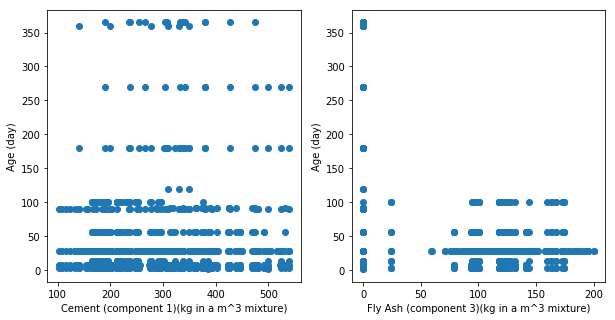

In [15]:
#Pitäisi valita malliin kaksi muuttujaa, joilla on korkeimmat korrelaatiot selitettävään muuttujaan.
# Water muuttuja ei toiminut aineistossa, useiden kokeilujen jälkeenkään,  joten muuttuvilla pienempi korrelaatiokerroin:
features = ['Cement (component 1)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)']

target = df['Age (day)']

#Lisään kuvion, jonka sisään sijoitan kaksi hajontakaaviota:
plt.figure(figsize=(10, 5))

#enumerate() on perehtymisen arvoinen:
for i, feature in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    plt.scatter(df[feature],target)
    plt.xlabel(feature)
    plt.ylabel('Age (day)')

Superplasticiser ja Water olisivat korreloineet paremminj keskenään, mutta en saanut Water-datasta kuviota jostain syystä aikaiseksi. Syy tähän jäi epäselväksi.

Muutenkin riippusvuus suhteiden tarkastelu ei loogista (Age oli helppo kopioida :)

In [16]:
X = df[['Cement (component 1)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)']] #feature-matriisi
y = df['Age (day)'] #target

In [17]:
#Jaan datan opetusdataan ja testidataan:

from sklearn.model_selection import train_test_split

#random_state varmistaa, että eri kokeilukerroilla saan aina saman jaon opetus- ja testidataan.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 2)
(206, 2)
(824,)
(206,)


Opetusdata ja testidata vastaa toisiaan

In [18]:
#Sovitan lineaarisen regressiomallin opetusdataan:

from sklearn.linear_model import LinearRegression

malli = LinearRegression()
malli.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
malli.intercept_ #Vakiotermi

48.69420536024595

In [20]:
#Mallin luotettavuuteen liittyvää statistiikkaa:

from sklearn.metrics import mean_squared_error

y_train_predict = malli.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = malli.score(X_train,y_train)

print('Mallin sopivuus opetusdataan')
print("--------------------------------------")
print('Keskivirhe: {}'.format(rmse))
print('Selityskerroin: {}'.format(r2))
print("\n")

y_test_predict = malli.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = malli.score(X_test, y_test)

print('Mallin sopivuus testidataan')
print('--------------------------------------')
print('Keskivirhe: {}'.format(rmse))
print('Selityskerroin: {}'.format(r2))

Mallin sopivuus opetusdataan
--------------------------------------
Keskivirhe: 62.134000039359606
Selityskerroin: 0.022354896161379312


Mallin sopivuus testidataan
--------------------------------------
Keskivirhe: 63.29770295214746
Selityskerroin: 0.03148392132056088


C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


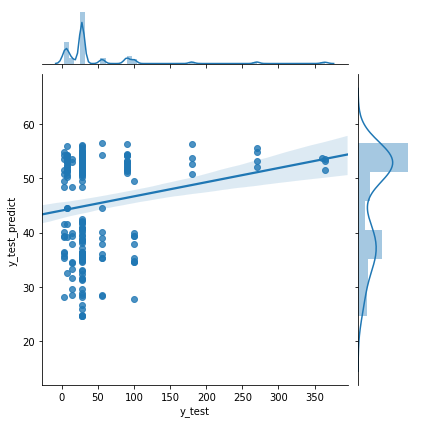

In [21]:
#Verrataan testidatan havaintoja mallin antamiin ennusteisiin:

#Luon ensin dataframen testiaineiston havainnoista ja mallin antamista ennusteista:
test = pd.DataFrame()
test['y_test'] = y_test
test['y_test_predict'] = y_test_predict

sns.jointplot(data=test, x='y_test',y='y_test_predict',kind='reg')

Malli ennustaa huonosti